In [1]:
import numpy as np
np1=np.array([[1,2,3],[4,5,6]])
np1.shape

(2, 3)

In [2]:
np1[1:]

array([[4, 5, 6]])

In [3]:
w = np.random.rand(9)
w

array([0.40524357, 0.73921938, 0.49691103, 0.15125243, 0.21504673,
       0.17623187, 0.59585418, 0.06696071, 0.11235409])

In [4]:
w[1:3:2]

array([0.73921938])

In [5]:
import numpy as np
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta;
        self.n_iter = n_iter;
        
    def fit(self, X, y):
        self.w_ = np.zeros(1+ X.shape[1])
        self.errors_= []
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(X, y):
                update =self.eta * (target - self.predict(xi))
                #print(update)
                #print(self.w_)
                self.w_[1:] += update *xi
                #print(xi)
                self.w_[0] += update
                errors += int(update != 0.0)
                #print(errors)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [6]:
#zip means generate a couple (a,b)

In [7]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()  #show first 5 data if last use tail()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<function matplotlib.pyplot.show(*args, **kw)>

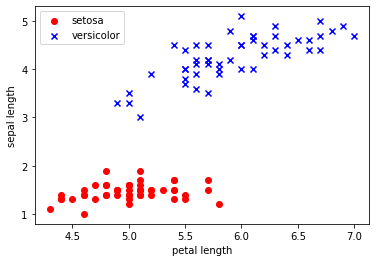

In [8]:
import matplotlib.pyplot as plt
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show

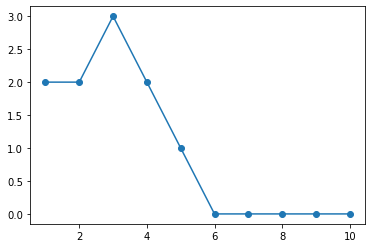

In [9]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot( range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

In [41]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
        markers = ('s', 'x', 'o', '^', 'v')
        colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
        camp = ListedColormap(colors[:len(np.unique(y))])    #unique= show the aarray after deleting the repeating numbers
        
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)    #ravel= from matrix to 1-D array
        #print(xx1)
        #print(xx2)
        #print(Z)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.4, camp=camp)  #等高線圖
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        
        for idx, c1 in enumerate(np.unique(y)):
            plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1], alpha=0.8, c=camp(idx), marker=markers[idx], label=c1)

<ipython-input-41-d7deaedf5c65>:16: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contourf(xx1, xx2, Z, alpha=0.4, camp=camp)  #等高線圖
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


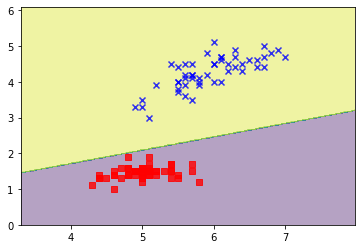

In [42]:
plot_decision_regions(X, y,  classifier=ppn)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.

